와인 종류 구분하기
- 레드와인 샘플 1,599개와 화이트와인 샘플 4,898개의 데이터
- 산도, 맛, 등급 등의 정보를 이용하여 레드 또는 화이트 와인을 구분하기


In [4]:
import os
import pandas as pd

path = 'D:\elice_python\GAS_5\pytest'

os.chdir(path)

In [5]:
df = pd.read_csv('wine.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [6]:
df = df.sample(frac=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
2385,7.7,0.34,0.28,11.0,0.040,31.0,117.0,0.99815,3.27,0.29,9.2,6,0
2793,6.2,0.37,0.22,8.3,0.025,36.0,216.0,0.99640,3.33,0.60,9.6,6,0
2324,6.4,0.39,0.21,1.2,0.041,35.0,136.0,0.99225,3.15,0.46,10.2,5,0
6016,6.2,0.22,0.28,2.2,0.040,24.0,125.0,0.99170,3.19,0.48,10.5,6,0
4768,5.7,0.16,0.26,6.3,0.043,28.0,113.0,0.99360,3.06,0.58,9.9,6,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 2385 to 6014
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [8]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [9]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [10]:
X.shape, y.shape

((6497, 12), (6497,))

In [11]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size = 0.2 , random_state = 42)

In [12]:
X_train[11].unique(), X_test[11].unique()

(array([5, 6, 7, 8, 4, 3, 9], dtype=int64),
 array([6, 5, 7, 8, 4, 3, 9], dtype=int64))

In [13]:
from keras.models import Sequential
from keras.layers import  Dense, Input

In [14]:
model = Sequential()
model.add(Input((12,)))
model.add(Dense(32,activation = 'relu', input_shape = (12,)))
model.add(Dense(16,activation = 'relu'))
model.add(Dense(8,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,089
Trainable params: 1,089
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss = 'binary_crossentropy', 
              optimizer='adam', 
              metrics=['acc'])
history = model.fit(X_train, y_train, 
                    epochs=200, 
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/200
130/130 [==============================] - 2s 5ms/step - loss: 0.2283 - acc: 0.9242 - val_loss: 0.1994 - val_acc: 0.9250
Epoch 2/200
130/130 [==============================] - 0s 3ms/step - loss: 0.1883 - acc: 0.9353 - val_loss: 0.1927 - val_acc: 0.9327
Epoch 3/200
130/130 [==============================] - 0s 3ms/step - loss: 0.1651 - acc: 0.9425 - val_loss: 0.2066 - val_acc: 0.9327
Epoch 4/200
130/130 [==============================] - 1s 4ms/step - loss: 0.1593 - acc: 0.9442 - val_loss: 0.1688 - val_acc: 0.9356
Epoch 5/200
130/130 [==============================] - 1s 5ms/step - loss: 0.1390 - acc: 0.9492 - val_loss: 0.2124 - val_acc: 0.9288
Epoch 6/200
130/130 [==============================] - 0s 4ms/step - loss: 0.1265 - acc: 0.9538 - val_loss: 0.1441 - val_acc: 0.9510
Epoch 7/200
130/130 [==============================] - 1s 4ms/step - loss: 0.1205 - acc: 0.9584 - val_loss: 0.1311 - val_acc: 0.9567
Epoch 8/200
130/130 [==============================] - 0s 4ms/step - 

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print(val_acc)

[0.925000011920929, 0.932692289352417, 0.932692289352417, 0.9355769157409668, 0.9288461804389954, 0.9509615302085876, 0.9567307829856873, 0.9634615182876587, 0.9615384340286255, 0.9576923251152039, 0.9682692289352417, 0.9634615182876587, 0.9682692289352417, 0.9701923131942749, 0.9663461446762085, 0.9692307710647583, 0.9663461446762085, 0.9721153974533081, 0.9653846025466919, 0.9711538553237915, 0.9682692289352417, 0.9692307710647583, 0.9769230484962463, 0.9576923251152039, 0.9721153974533081, 0.9759615659713745, 0.9750000238418579, 0.9673076868057251, 0.9730769395828247, 0.9663461446762085, 0.9442307949066162, 0.9769230484962463, 0.9778845906257629, 0.9778845906257629, 0.9692307710647583, 0.9538461565971375, 0.9153845906257629, 0.9788461327552795, 0.9798076748847961, 0.9759615659713745, 0.9788461327552795, 0.9769230484962463, 0.9730769395828247, 0.9711538553237915, 0.9788461327552795, 0.9759615659713745, 0.9798076748847961, 0.9759615659713745, 0.9788461327552795, 0.9759615659713745, 0.

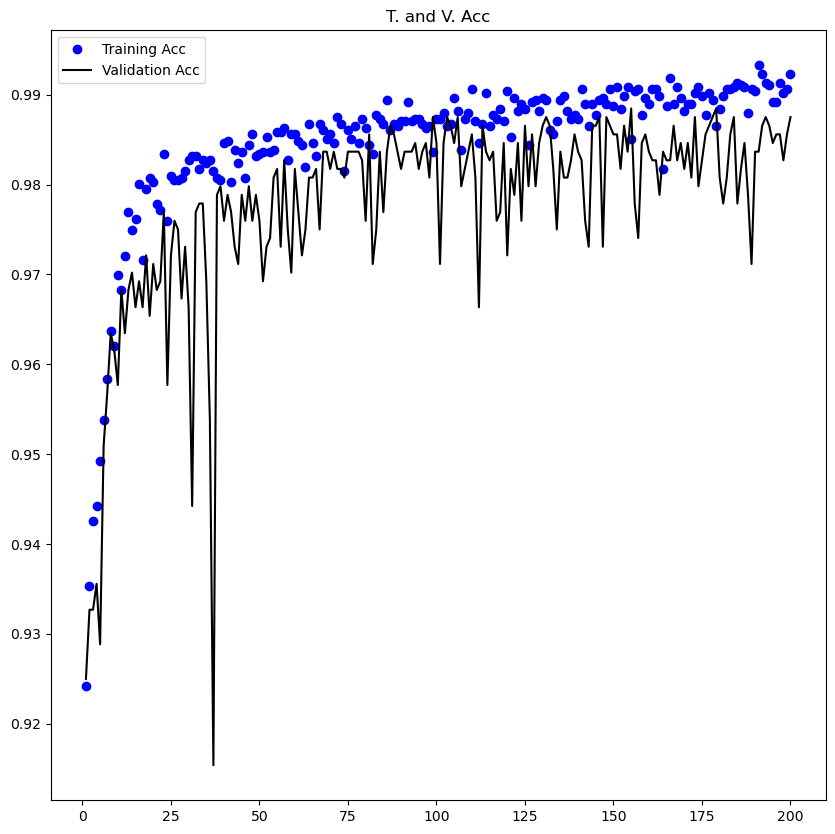

In [20]:
import matplotlib.pyplot as plt
epochs = range(1,len(acc)+1)
plt.figure(figsize=(10,10))
plt.plot(epochs, acc, 'bo', label = 'Training Acc')
plt.plot(epochs, val_acc, 'black', label = 'Validation Acc')
plt.title('T. and V. Acc')
plt.legend()
plt.show()

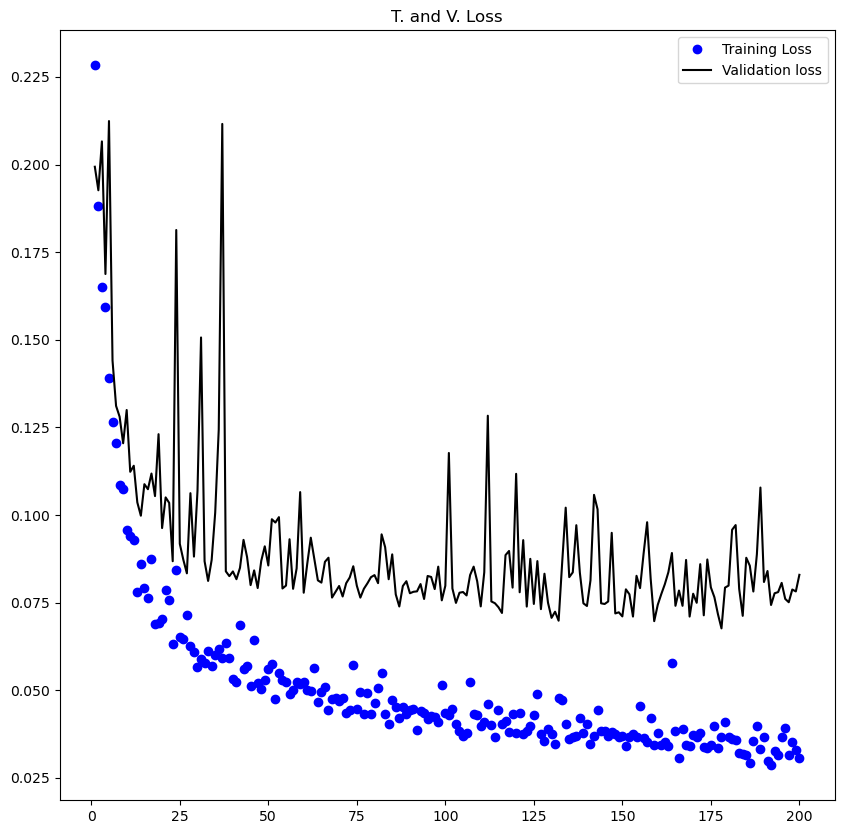

In [22]:
import matplotlib.pyplot as plt
epochs = range(1,len(acc)+1)
plt.figure(figsize=(10,10))
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'black', label = 'Validation loss')
plt.title('T. and V. Loss')
plt.legend()
plt.show()

In [23]:
evaluation = model.evaluate(X_test,y_test)
print(f'loss : {evaluation[0]}')
print(f'acc : {evaluation[1]}')

41/41 [==============================] - 0s 3ms/step - loss: 0.0549 - acc: 0.9869
loss : 0.05492966249585152
acc : 0.986923098564148


In [24]:
model_dir = os.path.join(path,'models')
# if not os.path.exists(model_dir):
#     os.mkdir(model_dir)
model.save(os.path.join(model_dir,'wine.h5'),)

In [25]:
modelpath = os.path.join(model_dir, '{epoch:d}-{val_loss:.4f}_wine.keras')
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(
    filepath=modelpath,  
                               monitor = 'val_loss', 
                               verbose=1,
                               save_best_only = True
                               )

model.fit(X_train, y_train, 
          epochs=200, 
          batch_size=32, 
          validation_split=0.2, 
          verbose=1,
          callbacks = [checkpointer]
          )

Epoch 1/200
121/130 [==========================>...] - ETA: 0s - loss: 0.0434 - acc: 0.9868
Epoch 1: val_loss improved from inf to 0.07420, saving model to D:\elice_python\GAS_5\pytest\models\1-0.0742_wine.keras
130/130 [==============================] - 1s 5ms/step - loss: 0.0427 - acc: 0.9875 - val_loss: 0.0742 - val_acc: 0.9865
Epoch 2/200
130/130 [==============================] - ETA: 0s - loss: 0.0317 - acc: 0.9913
Epoch 2: val_loss improved from 0.07420 to 0.07290, saving model to D:\elice_python\GAS_5\pytest\models\2-0.0729_wine.keras
130/130 [==============================] - 1s 5ms/step - loss: 0.0317 - acc: 0.9913 - val_loss: 0.0729 - val_acc: 0.9856
Epoch 3/200
118/130 [==========================>...] - ETA: 0s - loss: 0.0350 - acc: 0.9915
Epoch 3: val_loss did not improve from 0.07290
130/130 [==============================] - 1s 4ms/step - loss: 0.0332 - acc: 0.9918 - val_loss: 0.0795 - val_acc: 0.9856
Epoch 4/200
113/130 [=========================>....] - ETA: 0s - loss:

In [27]:
from tensorflow.keras.models import load_model
best_model_name = '33-0.0672_wine.keras'
loaded_model = load_model(os.path.join(model_dir, best_model_name))
# loaded_model.predict = (X_test)
loaded_model.evaluate(X_test, y_test)

41/41 [==============================] - 0s 2ms/step - loss: 0.0485 - acc: 0.9892


[0.0485234260559082, 0.989230751991272]